# Classification Project - EDA

# Introduction
This is a classification project in which the predictions will be about knowing to which class a certain observation belongs to. There can be two classes or more than two classes. The current case involves only two classes which makes this a binary classification.

As for any machine learning project, the first step will be the Exploratory Data Analysis or EDA. In EDA the data will be analyzed in detail. Here we will check for missing or null values, any errors in the entries or their data types, data distributions in all the columns, presence of any outliers, and check for correlations.

If any of the above are found to be out of the normal, they will be dealt with here before proceeding to model building.

## About the problem
Here there are certain variables pertaining to 250 companies with each row or observation belonging to each company. These variables will tell us whether the company will go bankrupt or not. These variables are:
1. Industrial Risk
2. Management Risk
3. Financial Flexibility
4. Credibility
5. Competitiveness
6. Operating Risk

These variables has values ranging between 0 to 1 with 0 being low, 0.5 being medium, and 1 being high based on the columns purpose. The combination of these variables will tell us whether that company will go bankrupt or not. And these results are stored in the Class column.

The goal here is to build some classification models that will be trained on this data and will make predictions on new data.

## Importing the libraries

For EDA, the important libraries are pandas for reading the file and for some dataframe operations, matplotlib and seaborn for making graphical analysis on the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('bankruptcy-prevention.csv', sep = ';')
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
data.columns = ['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk', 'Class']
data

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


-----------

### Checking for null values and data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Industrial Risk        250 non-null    float64
 1   Management Risk        250 non-null    float64
 2   Financial Flexibility  250 non-null    float64
 3   Credibility            250 non-null    float64
 4   Competitiveness        250 non-null    float64
 5   Operating Risk         250 non-null    float64
 6   Class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


------------

The data table has no null values and there are no errors in the data types as well.

---------

### Checking for statistical parameters of each column

In [5]:
data.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---------------

### Converting the Class column into a Binary column
Since the Class column is a categorical one we cannot use it in model building and further analysis. So, to do these we need to change into an integer column retaining its categorical properties.

#### Using the label encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Class Code'] = le.fit_transform(data['Class'])
data

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class,Class Code
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [7]:
data.to_csv('bankruptcy-prevention_encoded.csv')

In [8]:
## Checking how many observations belong to either category
data.groupby('Class Code').size()

Class Code
0    107
1    143
dtype: int64

------------

### Checking for the correlations

In [9]:
data.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class Code
Industrial Risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
Management Risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
Financial Flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
Credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
Competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
Operating Risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
Class Code,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


-----------------

The Class columns has some high correlations with Financial Flexibility, Credibility, and Competitiveness.

------

### Box plots of all the columns
In the box plots we can find the presence of outliers in the data and also some information about the data distribution

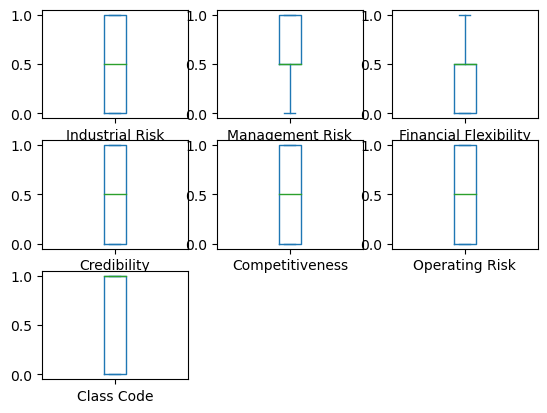

In [10]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

<Axes: >

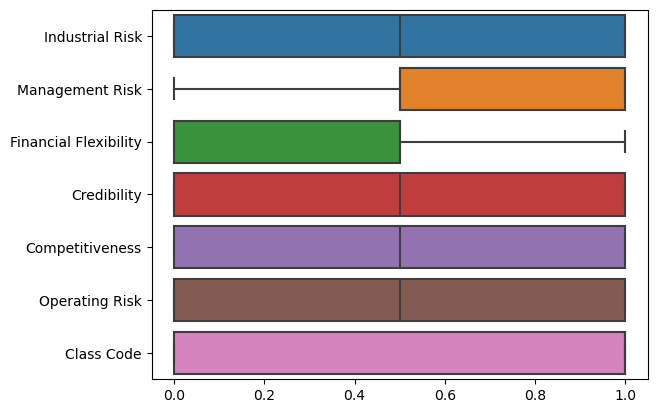

In [11]:
sns.boxplot(data = data, orient='h')

------------------

We can see that there are no outliers in the data.

------------

### Correlation heatmap
This is a graphical representation of the correlation matrix.

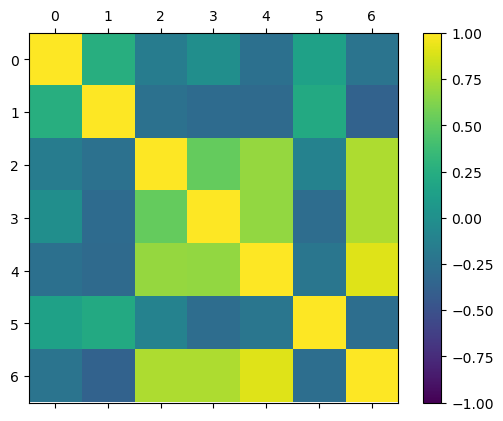

In [12]:
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111) #"111" means "1x1 grid, first subplot"
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

-------------------

### Density plots
These will give information about the distribution of the data.

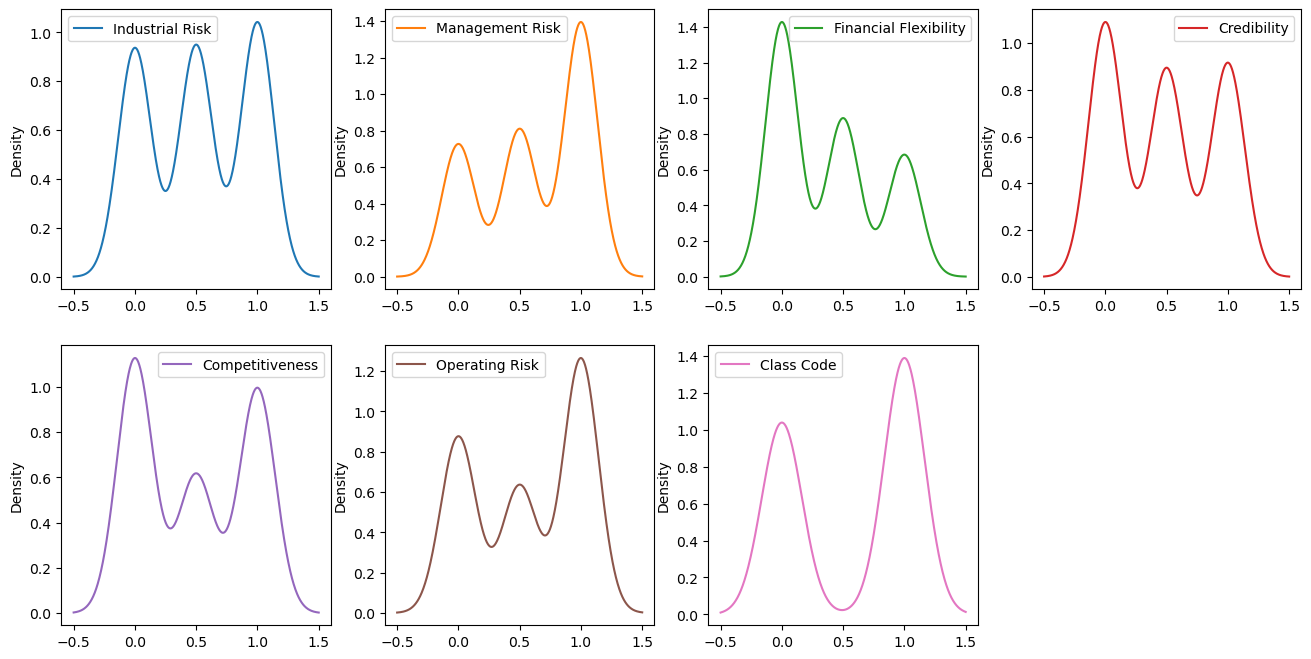

In [13]:
# Univariate Density Plots

data.plot(kind='density', subplots=True, layout=(2,4), sharex=False, figsize = (16, 8))
plt.show()

----------------------

### Histograms
These will give accurate information about the distribution of data.

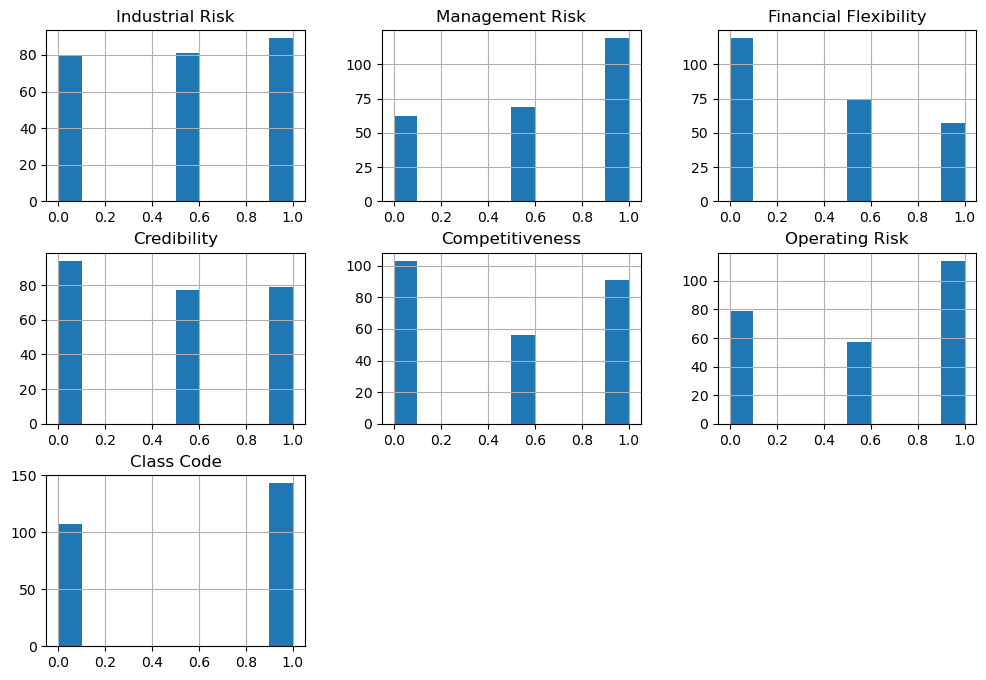

In [14]:
# Univariate Histograms

data.hist(figsize=(12, 8))
plt.show()

-----------------

We can see that in all the columns, the data is distributed at 0, 0.5, and 1 values.

------------
### Scatter plots
These plots are used to understand the correlations between different columns in a graphical manner.

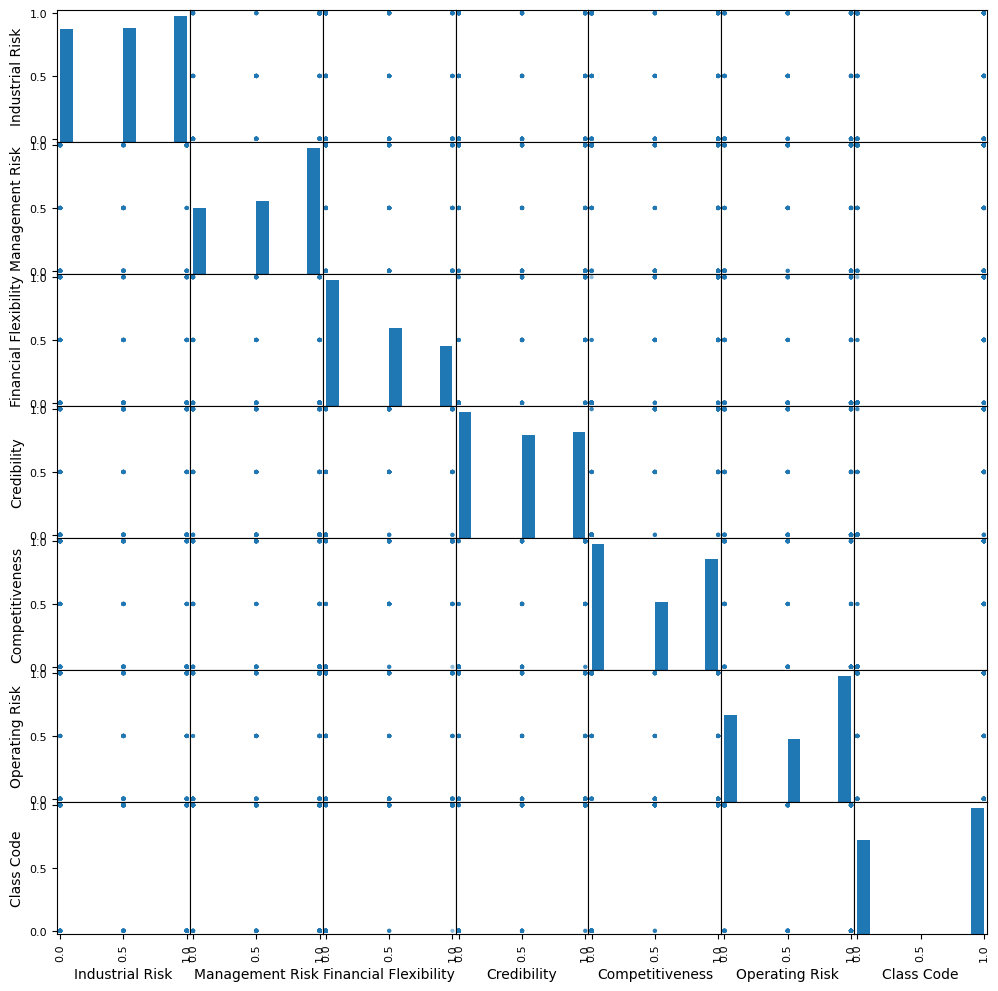

In [15]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(12, 12))
plt.show()

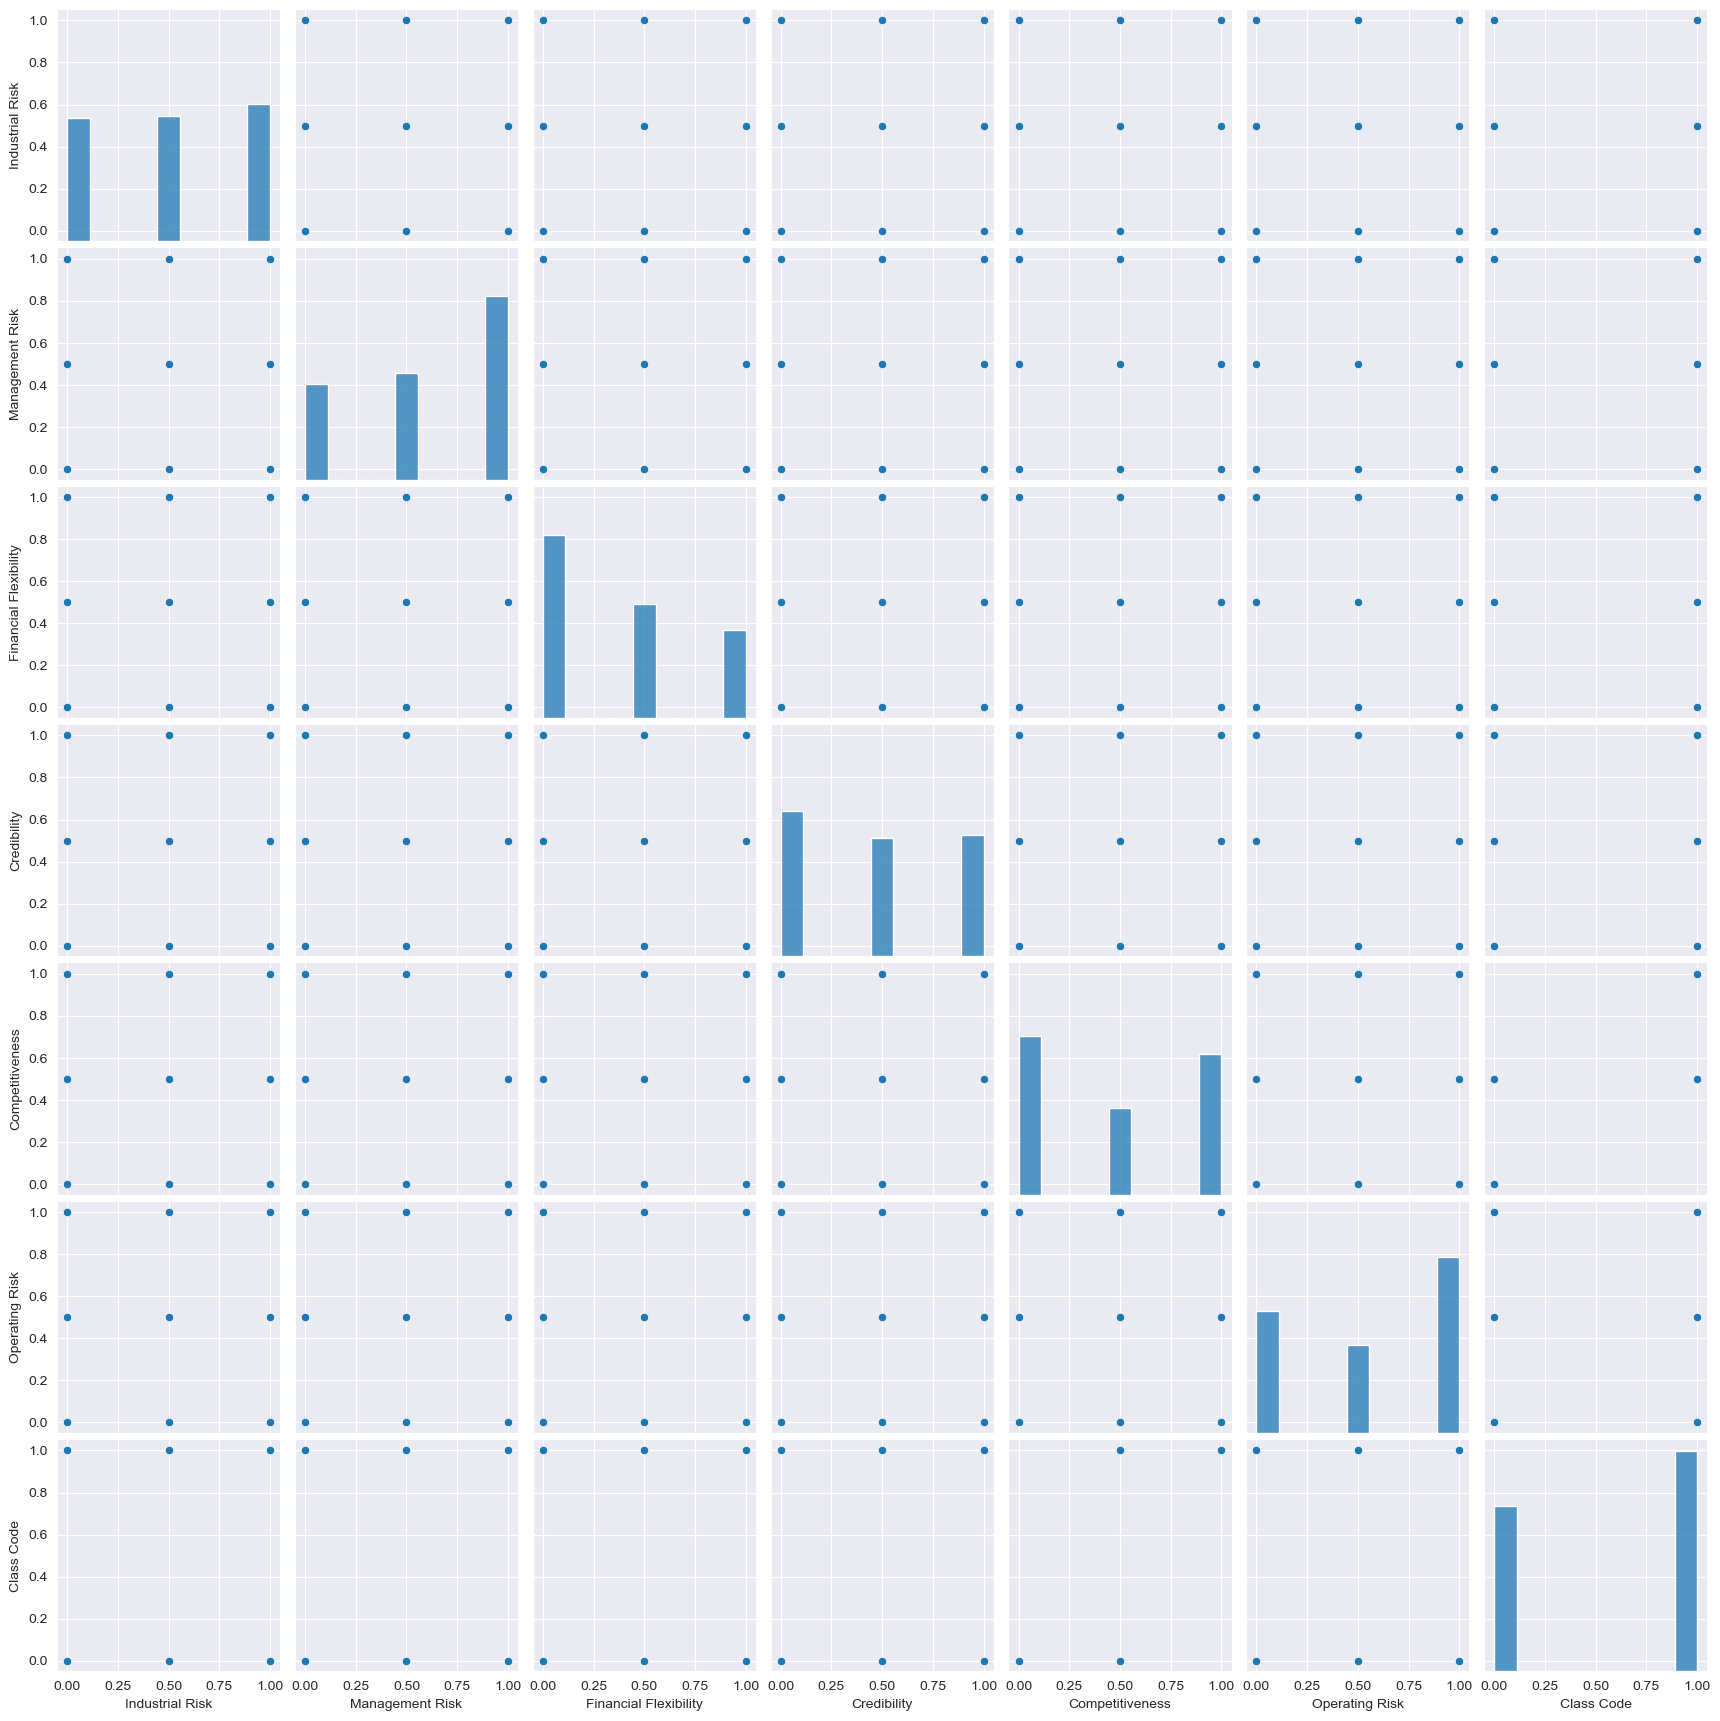

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

--------------------

Since the distribution of the data in all the columns is restricted to only 3 specific values, the graphical representation of these correlations is not that clear when compared to the correlation matrix above.

### Checking count of each category in the independent variables
Here the count of each category in the variables can be seen both in tabular and visual formats.

In [17]:
print(data['Industrial Risk'].value_counts())
print('----------------------------------------------')
print(data['Management Risk'].value_counts())
print('----------------------------------------------')
print(data['Financial Flexibility'].value_counts())
print('----------------------------------------------')
print(data['Credibility'].value_counts())
print('----------------------------------------------')
print(data['Competitiveness'].value_counts())
print('----------------------------------------------')
print(data['Operating Risk'].value_counts())

1.0    89
0.5    81
0.0    80
Name: Industrial Risk, dtype: int64
----------------------------------------------
1.0    119
0.5     69
0.0     62
Name: Management Risk, dtype: int64
----------------------------------------------
0.0    119
0.5     74
1.0     57
Name: Financial Flexibility, dtype: int64
----------------------------------------------
0.0    94
1.0    79
0.5    77
Name: Credibility, dtype: int64
----------------------------------------------
0.0    103
1.0     91
0.5     56
Name: Competitiveness, dtype: int64
----------------------------------------------
1.0    114
0.0     79
0.5     57
Name: Operating Risk, dtype: int64


<Axes: title={'center': 'Operating Risk'}>

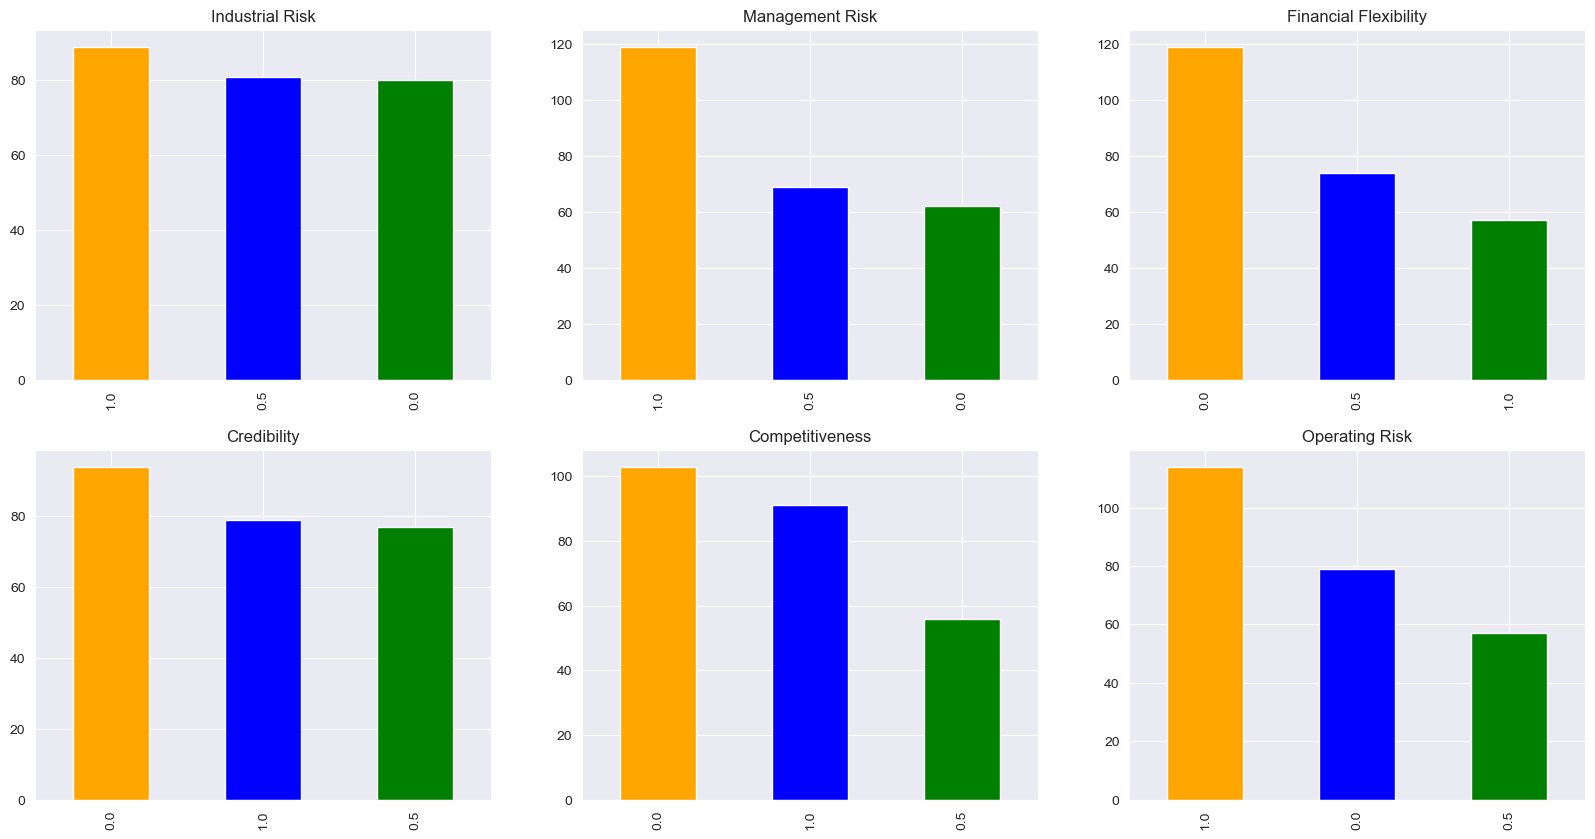

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
data['Industrial Risk'].value_counts().plot(kind='bar', ax = axes[0,0], title = 'Industrial Risk', color = ['orange', 'blue', 'green'])
data['Management Risk'].value_counts().plot(kind='bar', ax = axes[0,1], title = 'Management Risk', color = ['orange', 'blue', 'green'])
data['Financial Flexibility'].value_counts().plot(kind='bar', ax = axes[0,2], title = 'Financial Flexibility', color = ['orange', 'blue', 'green'])
data['Credibility'].value_counts().plot(kind='bar', ax = axes[1,0], title = 'Credibility', color = ['orange', 'blue', 'green'])
data['Competitiveness'].value_counts().plot(kind='bar', ax = axes[1,1], title = 'Competitiveness', color = ['orange', 'blue', 'green'])
data['Operating Risk'].value_counts().plot(kind='bar', ax = axes[1,2], title = 'Operating Risk', color = ['orange', 'blue', 'green'])

<Axes: title={'center': 'Operating Risk'}, ylabel='Operating Risk'>

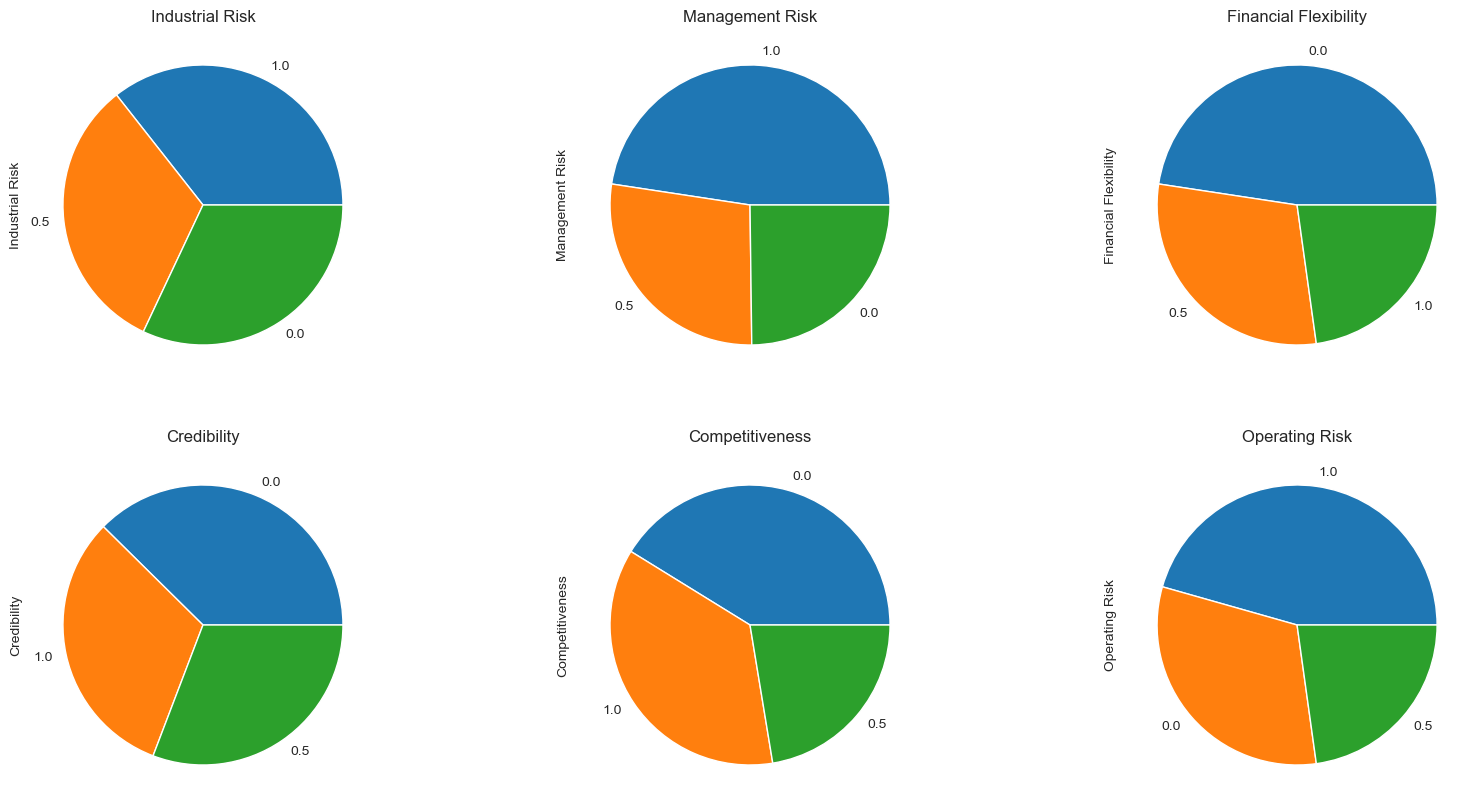

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
data['Industrial Risk'].value_counts().plot(kind='pie', ax = axes[0,0], title = 'Industrial Risk')
data['Management Risk'].value_counts().plot(kind='pie', ax = axes[0,1], title = 'Management Risk')
data['Financial Flexibility'].value_counts().plot(kind='pie', ax = axes[0,2], title = 'Financial Flexibility')
data['Credibility'].value_counts().plot(kind='pie', ax = axes[1,0], title = 'Credibility')
data['Competitiveness'].value_counts().plot(kind='pie', ax = axes[1,1], title = 'Competitiveness')
data['Operating Risk'].value_counts().plot(kind='pie', ax = axes[1,2], title = 'Operating Risk')

### Checking cross tables between independent and target variables
Here we can see how many observations in each category of the independent variables belongs to each category of the target variable.

Here we can see both the tabular and visual representations.

In [20]:
print(pd.crosstab(data['Industrial Risk'], data.Class))
print('----------------------------------------------')
print(pd.crosstab(data['Management Risk'], data.Class))
print('----------------------------------------------')
print(pd.crosstab(data['Financial Flexibility'], data.Class))
print('----------------------------------------------')
print(pd.crosstab(data['Credibility'], data.Class))
print('----------------------------------------------')
print(pd.crosstab(data['Competitiveness'], data.Class))
print('----------------------------------------------')
print(pd.crosstab(data['Operating Risk'], data.Class))

Class            bankruptcy  non-bankruptcy
Industrial Risk                            
0.0                      26              54
0.5                      28              53
1.0                      53              36
----------------------------------------------
Class            bankruptcy  non-bankruptcy
Management Risk                            
0.0                      11              51
0.5                      23              46
1.0                      73              46
----------------------------------------------
Class                  bankruptcy  non-bankruptcy
Financial Flexibility                            
0.0                           102              17
0.5                             4              70
1.0                             1              56
----------------------------------------------
Class        bankruptcy  non-bankruptcy
Credibility                            
0.0                  87               7
0.5                  17              60
1.0      

<Axes: xlabel='Operating Risk'>

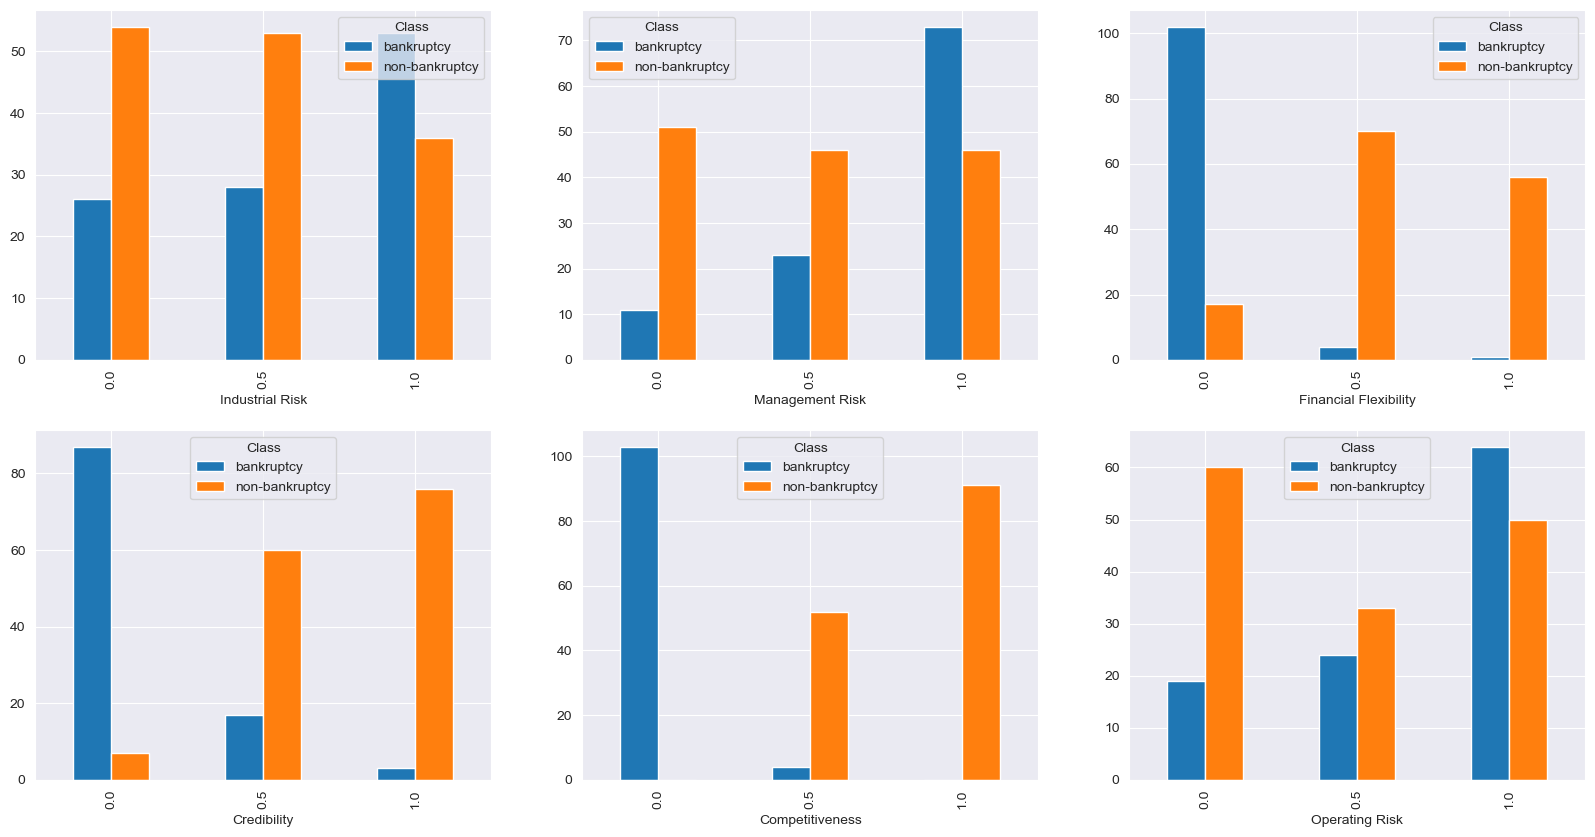

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
pd.crosstab(data['Industrial Risk'], data.Class).plot(kind = 'bar', ax = axes[0,0])
pd.crosstab(data['Management Risk'], data.Class).plot(kind = 'bar', ax = axes[0,1])
pd.crosstab(data['Financial Flexibility'], data.Class).plot(kind = 'bar', ax = axes[0,2])
pd.crosstab(data['Credibility'], data.Class).plot(kind = 'bar', ax = axes[1,0])
pd.crosstab(data['Competitiveness'], data.Class).plot(kind = 'bar', ax = axes[1,1])
pd.crosstab(data['Operating Risk'], data.Class).plot(kind = 'bar', ax = axes[1,2])

------------------

From the above illustrations we can understand that when the Industrial Risk, Management Risk, and Operating Risk are high, that is with values of 1, the chances of the company going bankrupt is very high.

Similarly, the other traits like Financial Flexibility, Credibility, and Competitiveness when high will reduce the chances of a company going bankrupt.

------------------

## Feature Extraction Techniques
To understand which features plays an important role in making the predictions.

### Recursive Feature Elimination - RFE
RFE is a feature selection technique that iteratively eliminates less important features based on an algorithm and importance-ranking metric to identify the most relevant subset of features.

In [22]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

x = data.iloc[:,:-2]
y = data.iloc[:,-1]

# feature extraction
model = LogisticRegression(max_iter=500)

rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(x, y)

fit.n_features_
fit.support_
fit.ranking_

array([2, 1, 1, 1, 1, 3])

### Extra Trees Classifier
Extra Trees Classifier utilizes multiple decision trees and selects features based on their importance scores, making it less sensitive to noise and irrelevant features

In [23]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(x, y)

print(model.feature_importances_)

[0.02504351 0.03254107 0.23461778 0.23573964 0.44859867 0.02345933]


--------------

Even though these techniques told us that few features are more important than the rest, here all the variables will definitely contribute something in telling whether a company will go bankrupt or not. So, all the variables will be used for model building.